<a href="https://colab.research.google.com/github/vahin-git/IDS/blob/main/IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.8.0
!pip install adversarial-robustness-toolbox

In [2]:
pip install matplotlib seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)

In [4]:
df_0 = pd.read_csv("/content/drive/MyDrive/Dissertation/archive-4_2/KDDTrain_main.txt")
df= df_0.copy()
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


In [5]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns

In [6]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.000,287.147,2604.526,0.000,0.000,0.000,0.000,42908.000
src_bytes,125972.000,45567.101,5870354.481,0.000,0.000,44.000,276.000,1379963888.000
dst_bytes,125972.000,19779.271,4021285.112,0.000,0.000,0.000,516.000,1309937401.000
land,125972.000,0.000,0.014,0.000,0.000,0.000,0.000,1.000
wrong_fragment,125972.000,0.023,0.254,0.000,0.000,0.000,0.000,3.000
urgent,125972.000,0.000,0.014,0.000,0.000,0.000,0.000,3.000
hot,125972.000,0.204,2.150,0.000,0.000,0.000,0.000,77.000
num_failed_logins,125972.000,0.001,0.045,0.000,0.000,0.000,0.000,5.000
logged_in,125972.000,0.396,0.489,0.000,0.000,0.000,1.000,1.000
num_compromised,125972.000,0.279,23.942,0.000,0.000,0.000,0.000,7479.000


In [9]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
#helper function for deeper analysis
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [11]:
cat_features = df.select_dtypes(include='object').columns
unique_values(df, cat_features)

Column: protocol_type
------------------------------
Unique Values (3): ['udp' 'tcp' 'icmp']

Value Counts:
protocol_type
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64

Column: service
------------------------------
Unique Values (70): ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

Value Counts:
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
 

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(125972, 43)

<Figure size 2000x4000 with 0 Axes>

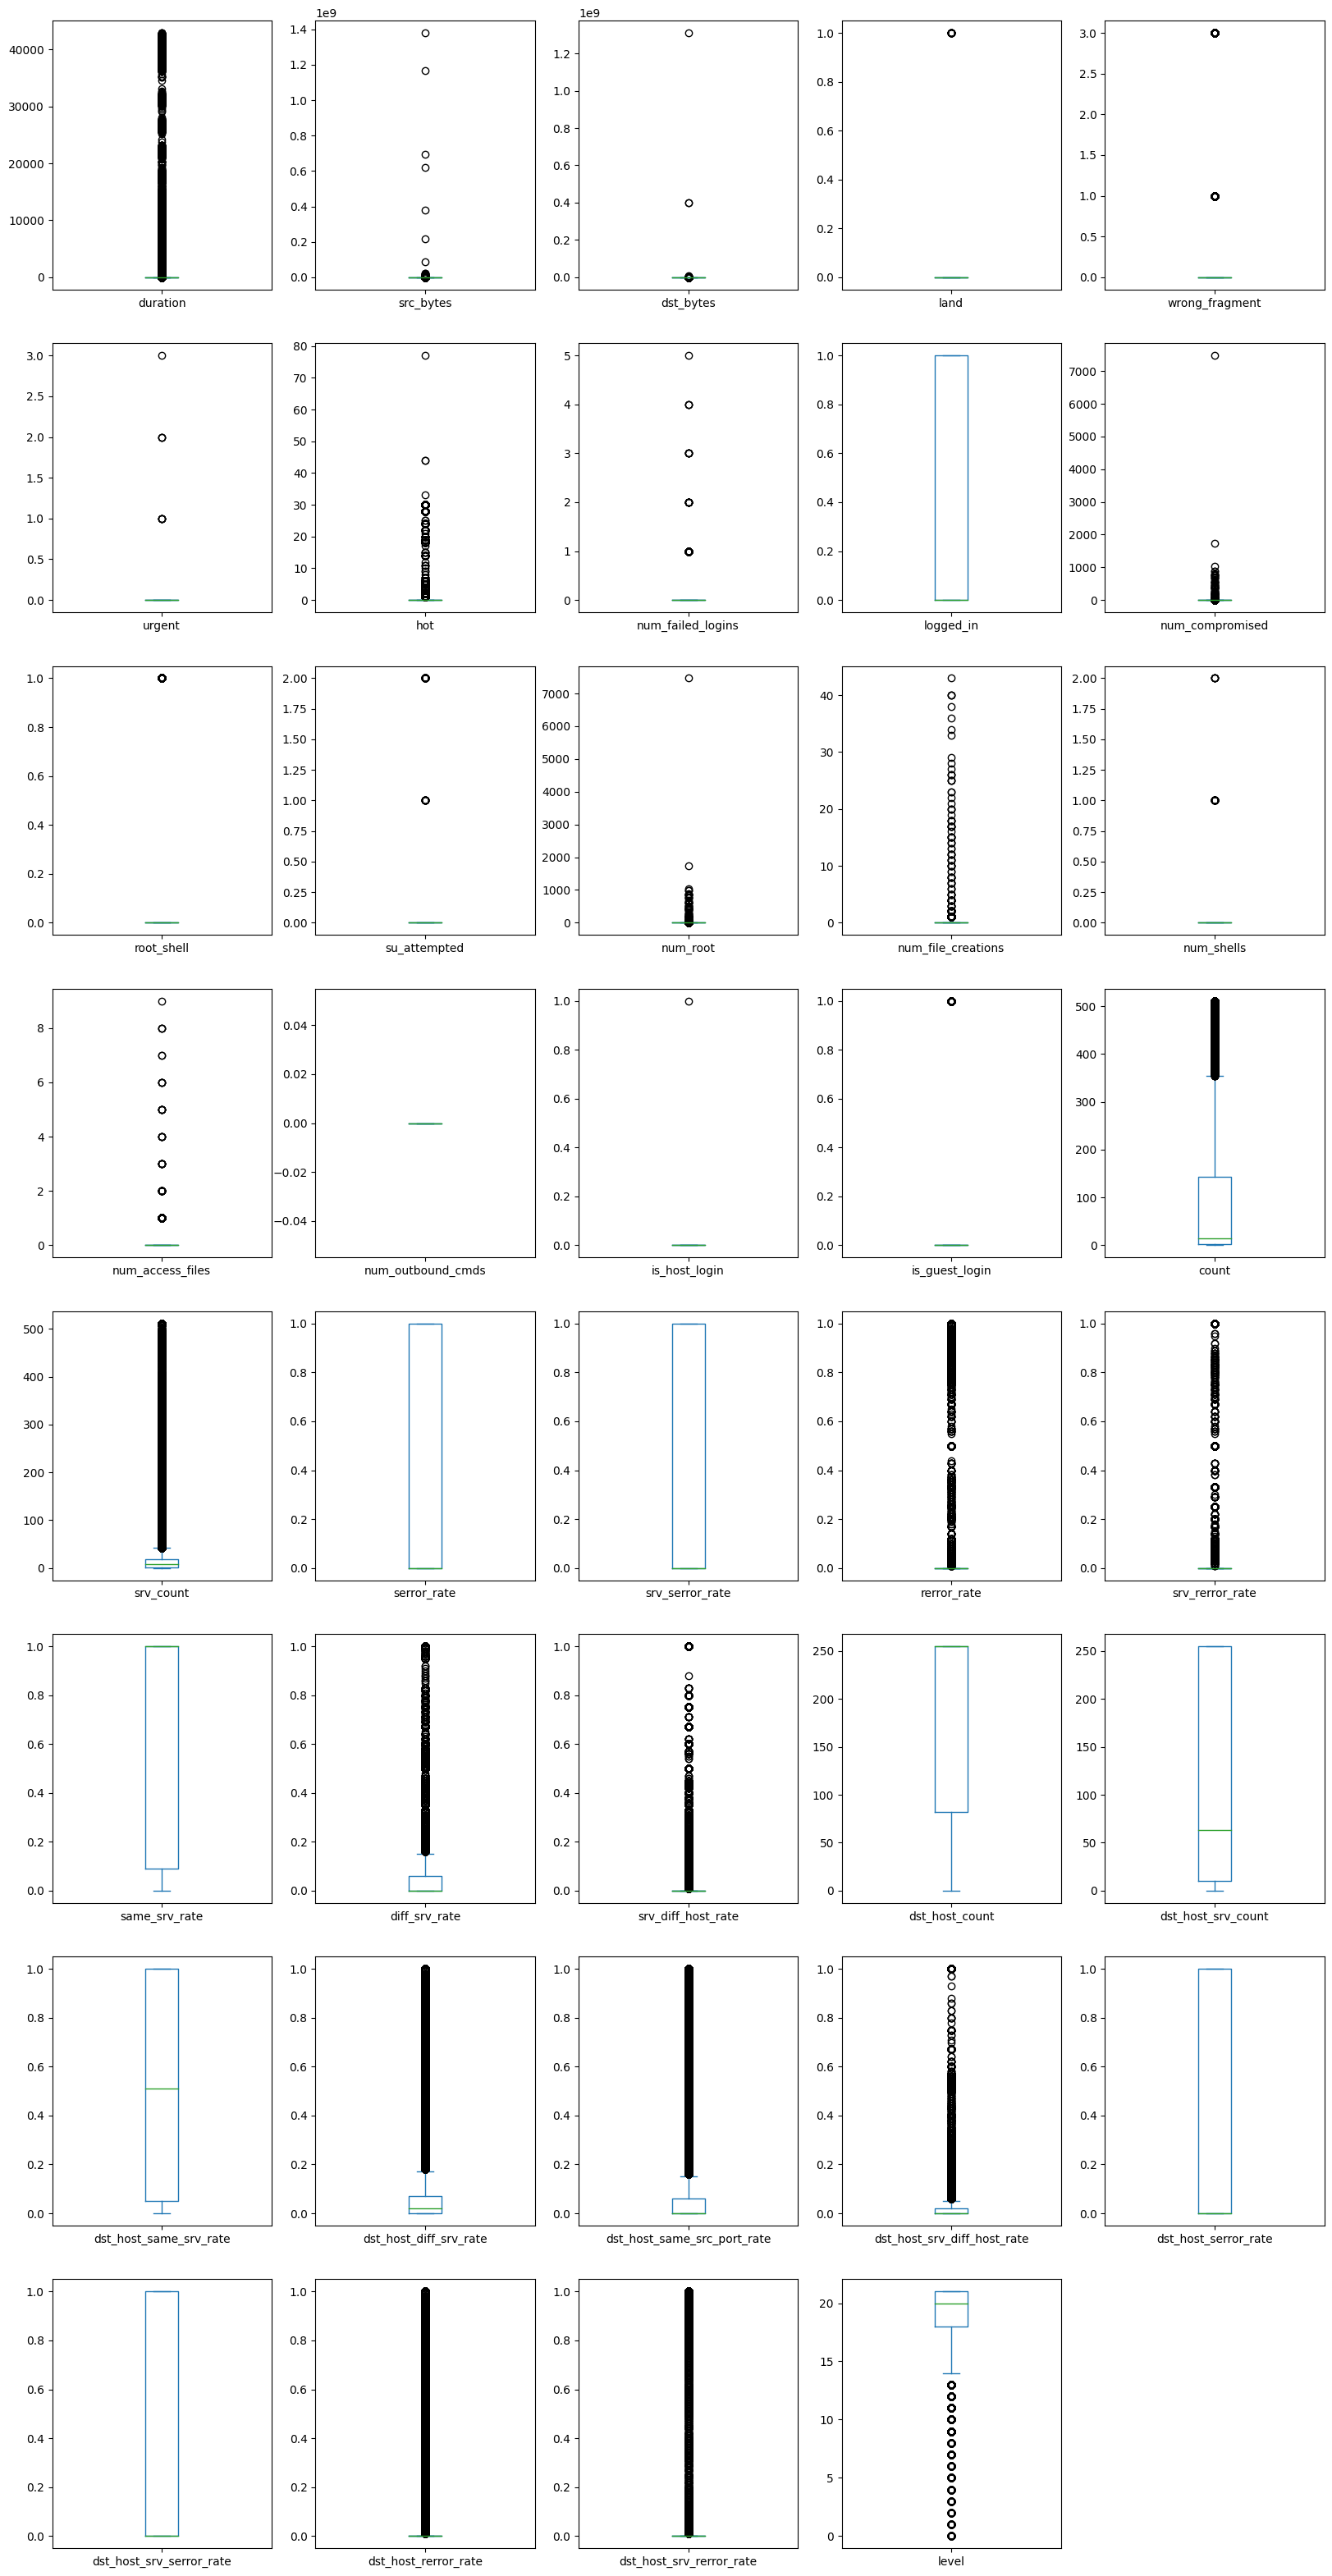

In [14]:
plt.figure(figsize=(20, 40))
df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

In [15]:
attack_n = []
for i in df.attack :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
df['attack'] = attack_n

In [16]:
df['attack'].unique()

array(['normal', 'attack'], dtype=object)

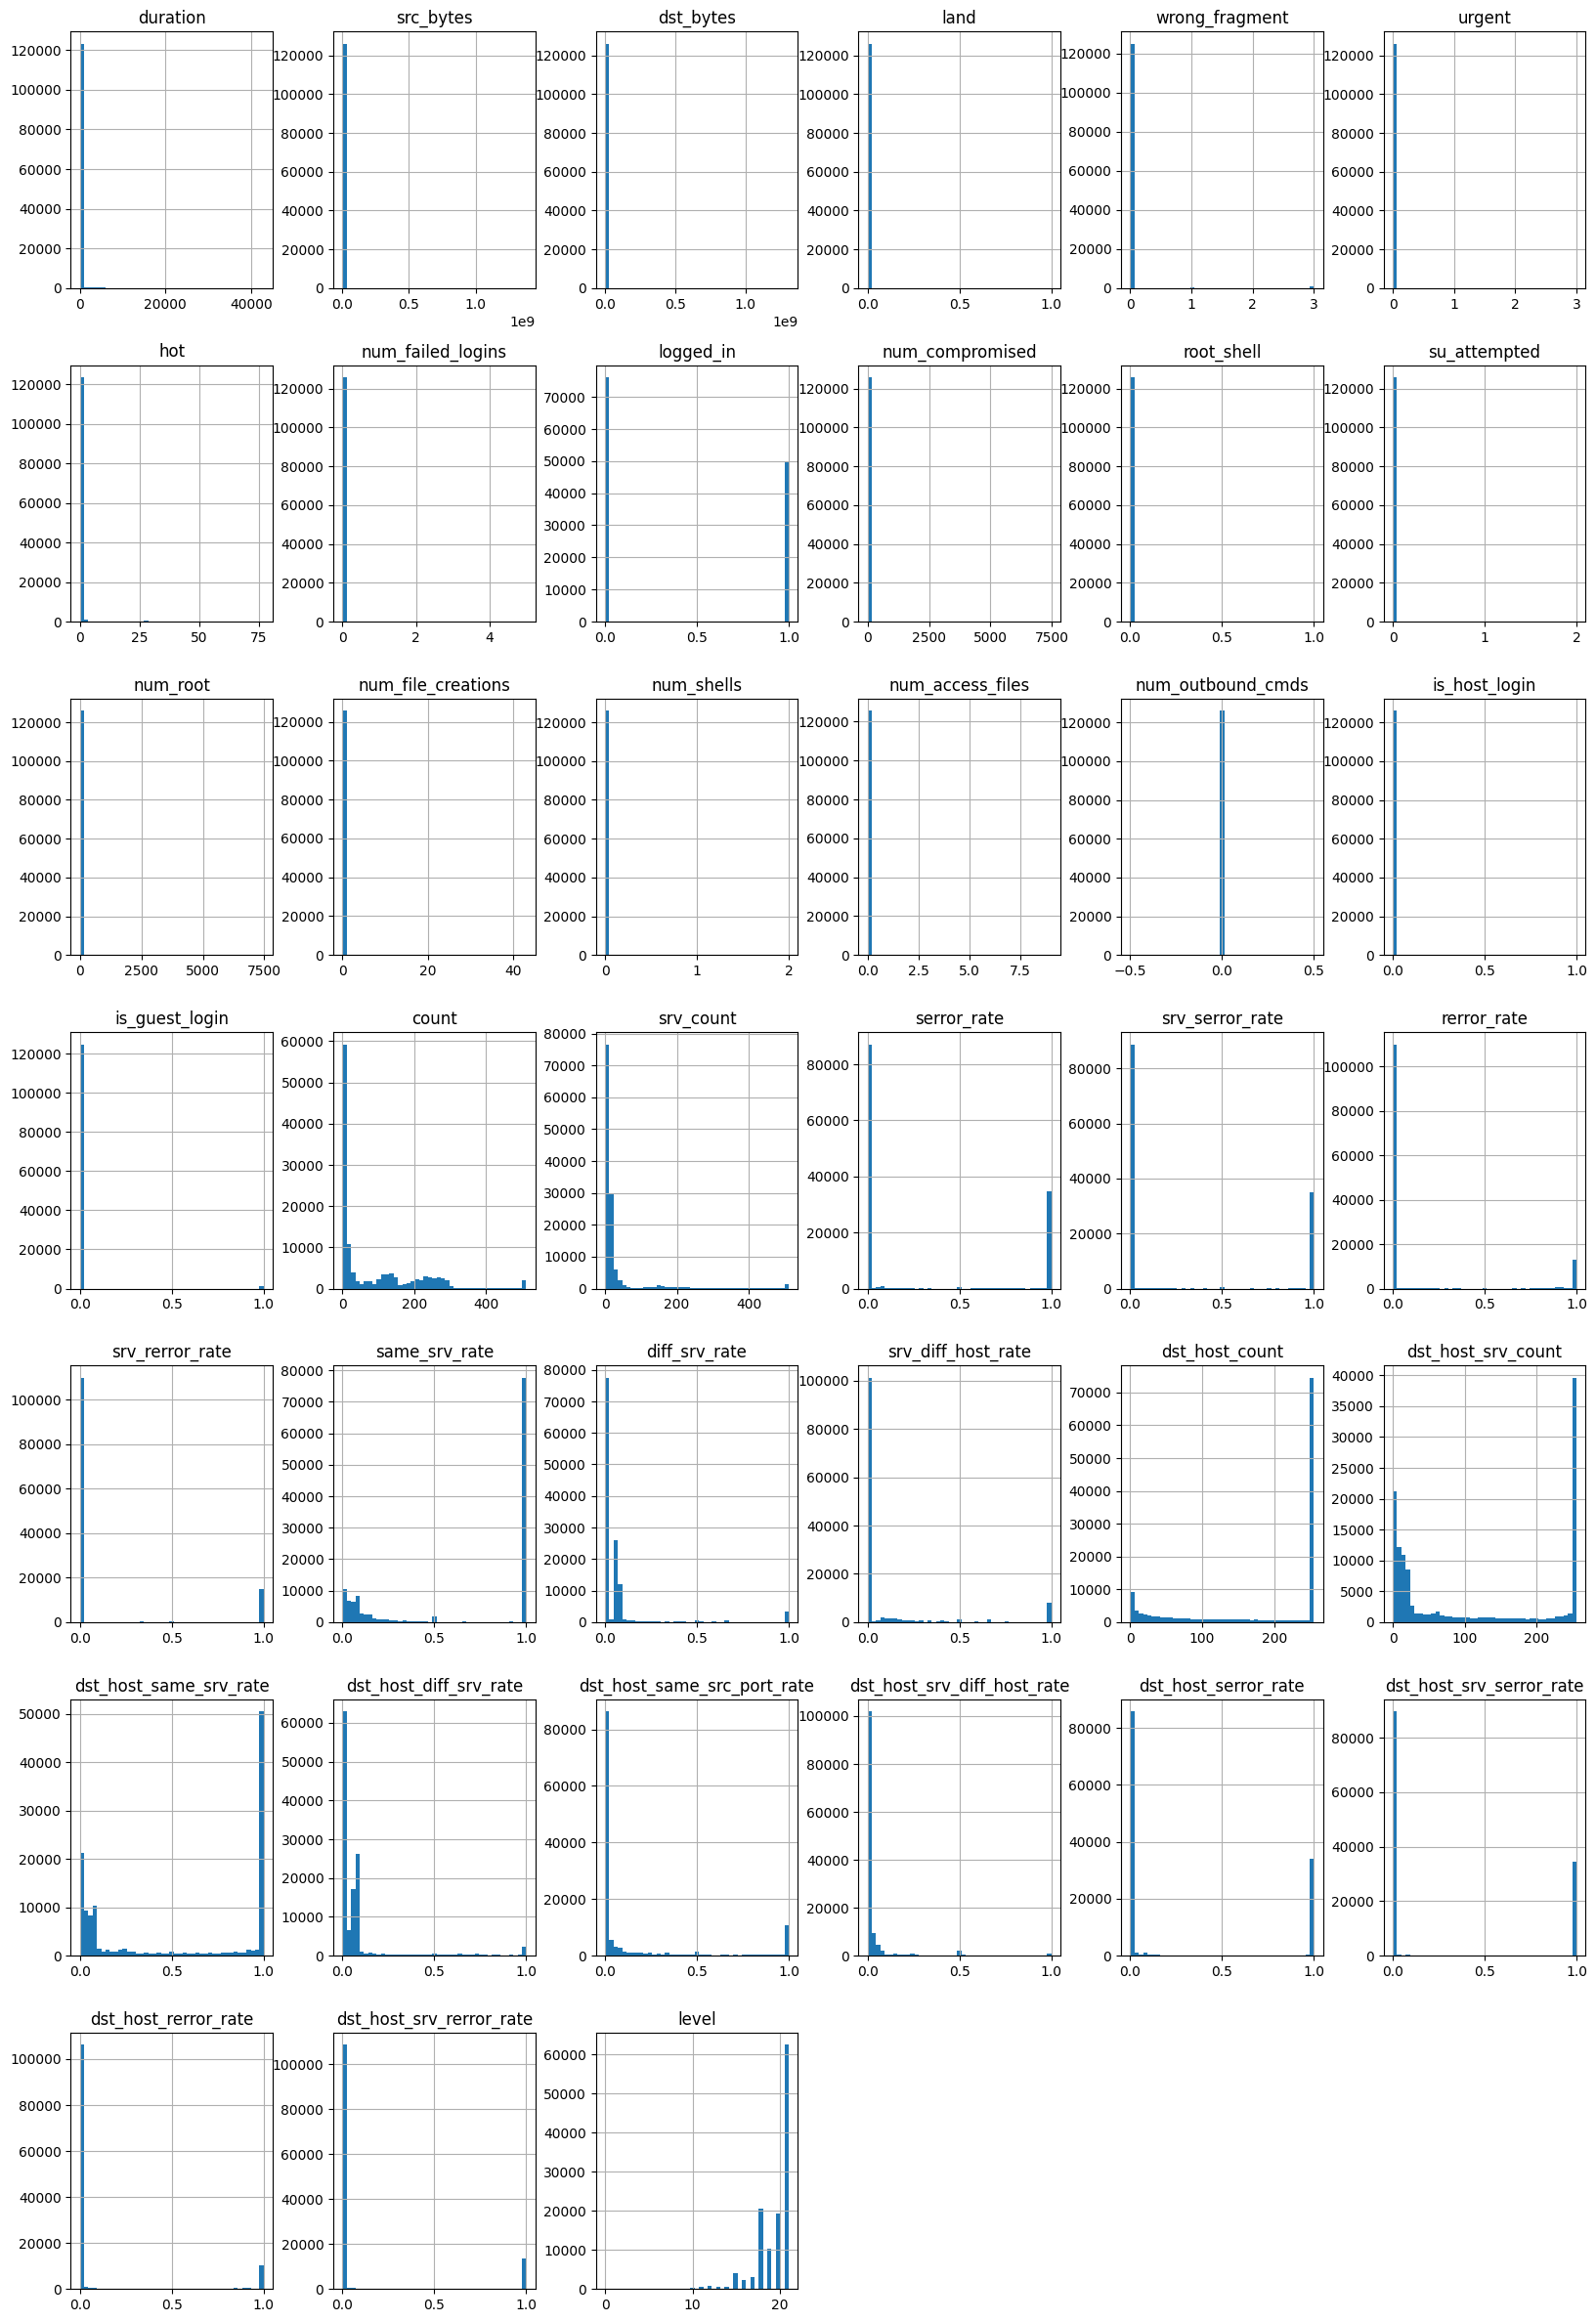

In [17]:
df.hist(bins=43,figsize=(20,30));

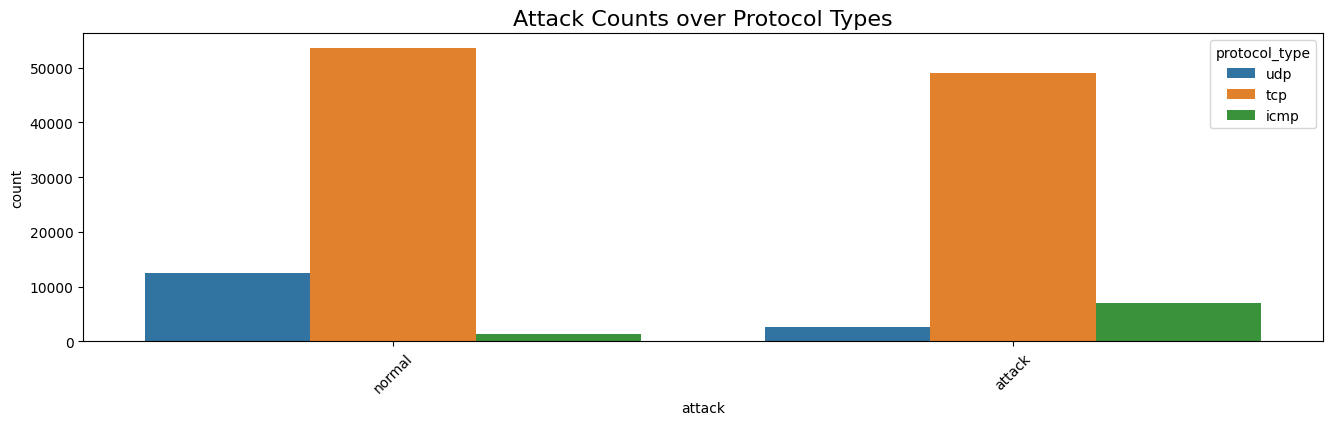

In [18]:
plt.figure(figsize=(16,4))
sns.countplot(x='attack',data=df,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Attack Counts over Protocol Types',fontdict={'fontsize':16})
plt.show()

In [19]:
df["protocol_type"].value_counts(normalize=True)

protocol_type
tcp    0.815
udp    0.119
icmp   0.066
Name: proportion, dtype: float64

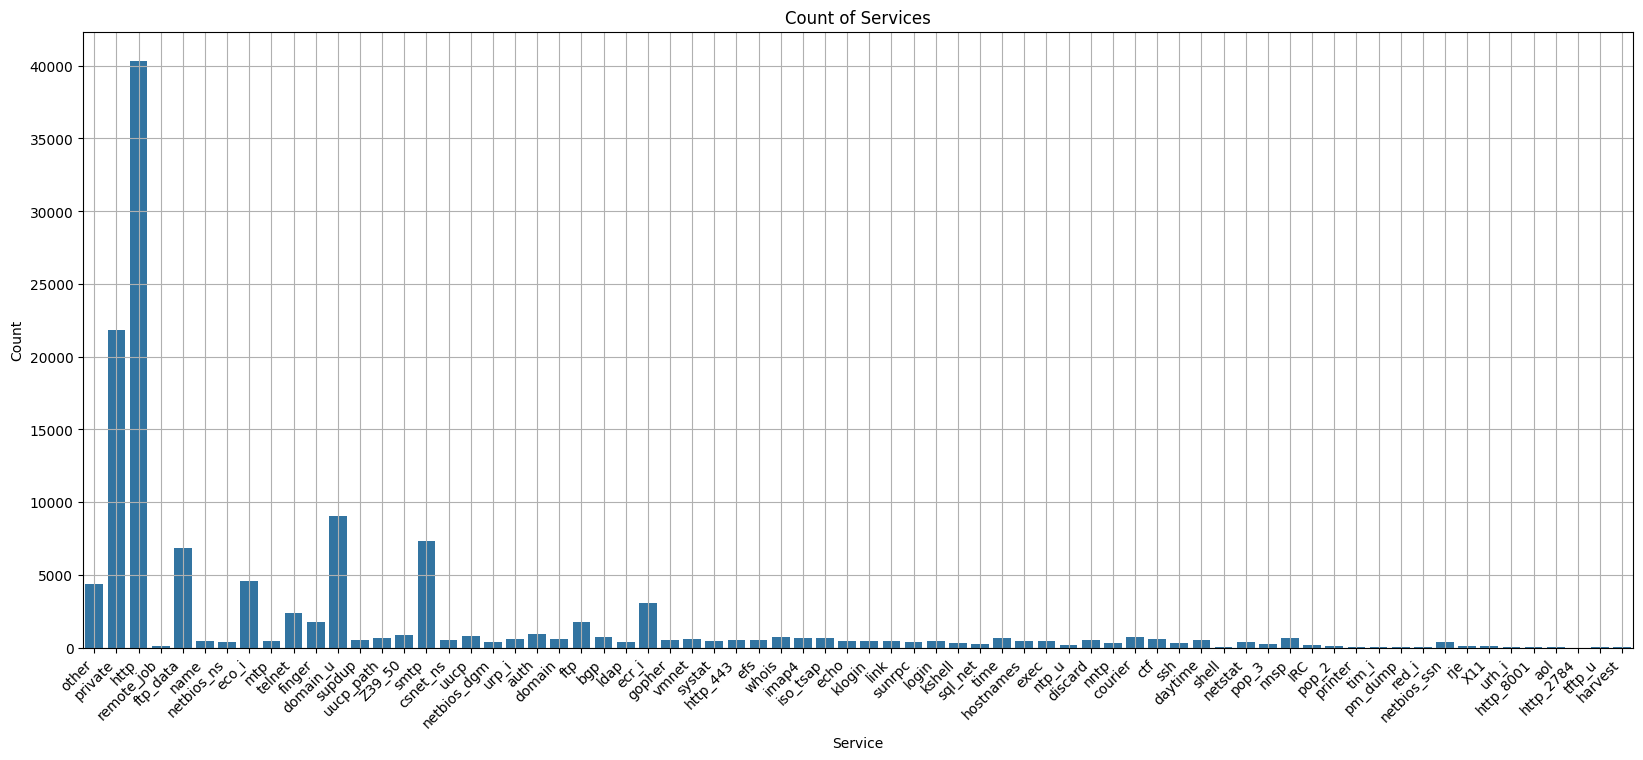

In [20]:
plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()

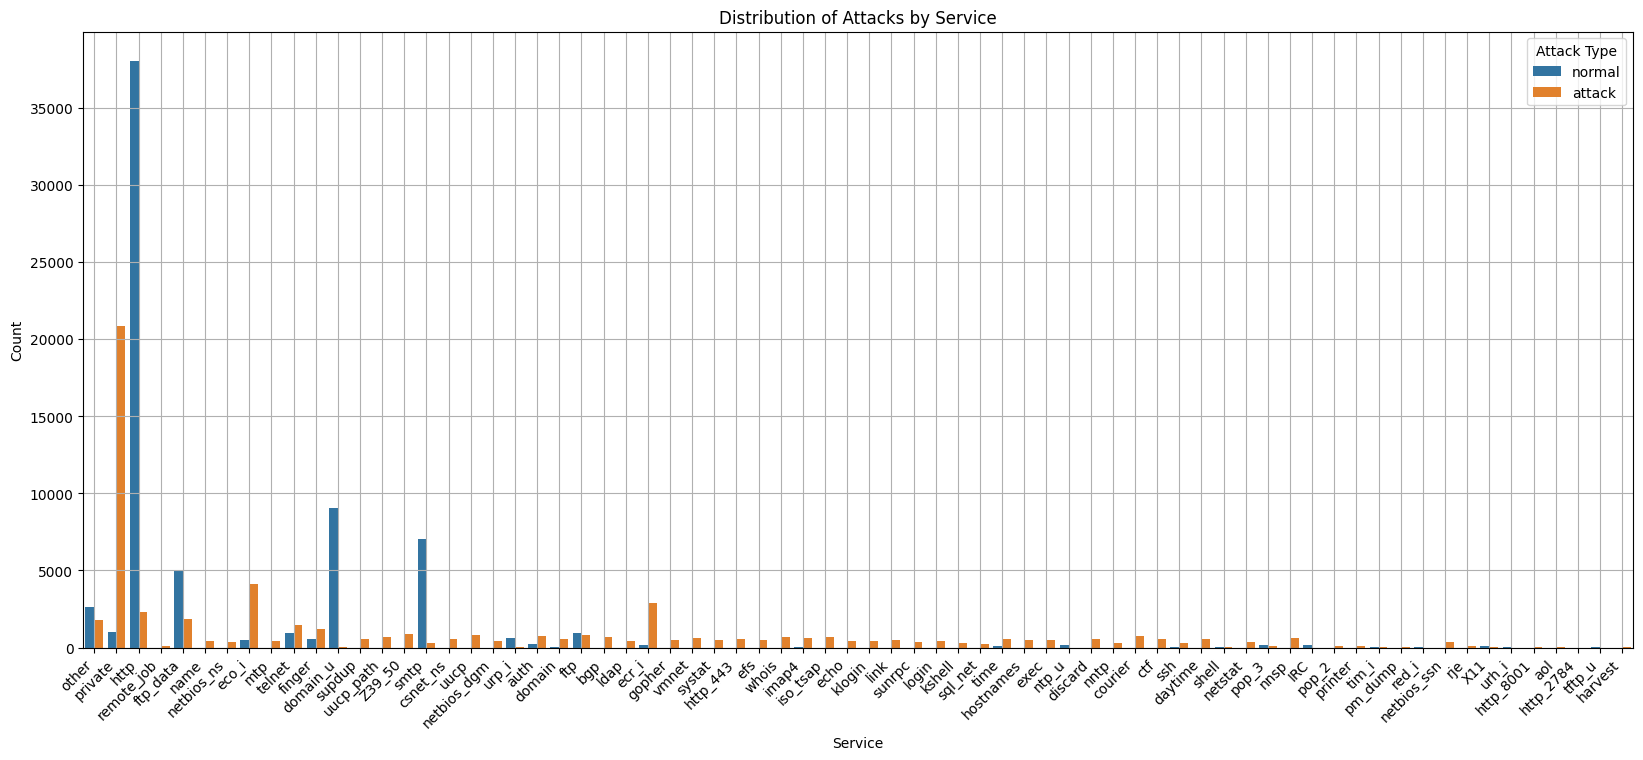

In [21]:
plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', hue='attack', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

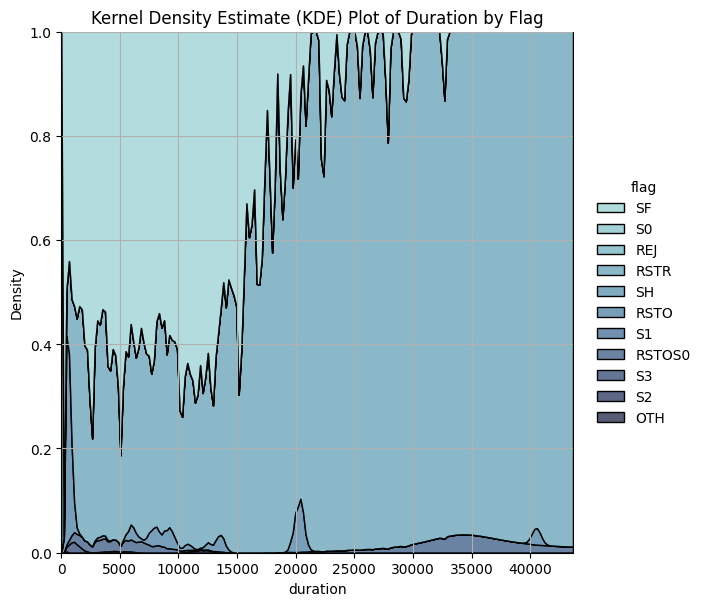

In [22]:
plt.figure(figsize=(12, 8))
sns.displot(
    data=df,
    x="duration",
    hue="flag",
    kind="kde",
    height=6,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)
plt.title('Kernel Density Estimate (KDE) Plot of Duration by Flag')
plt.grid(True)
plt.show()

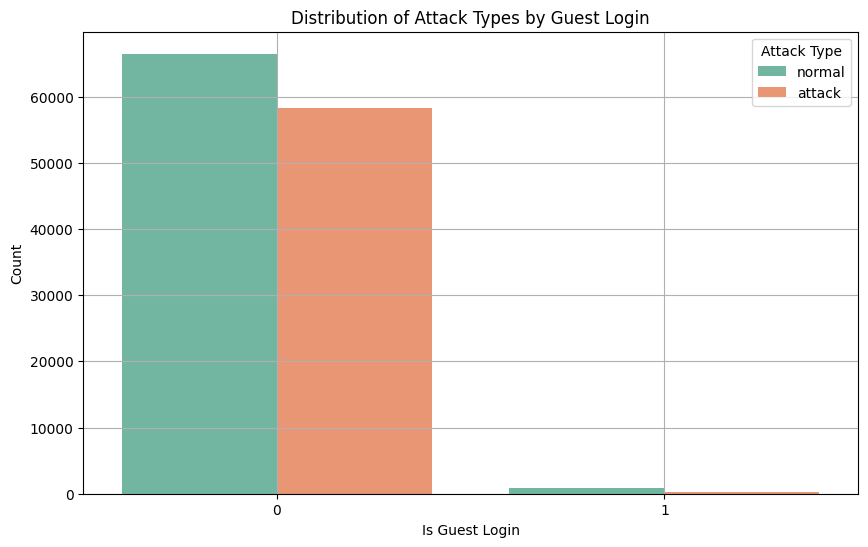

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='attack', data=df, palette='Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Guest Login')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

In [24]:
cat_features = df.select_dtypes(include='object').columns
cat_features

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [25]:
le=preprocessing.LabelEncoder()
clm=['protocol_type', 'service', 'flag', 'attack']
for x in clm:
    df[x]=le.fit_transform(df[x])

In [26]:
X = df.drop(["attack"], axis=1)
y = df["attack"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state=43)

In [27]:
train_index = X_train.columns
train_index

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

In [28]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_index
mutual_info.sort_values(ascending=False)

src_bytes                     0.566
service                       0.469
dst_bytes                     0.442
flag                          0.369
same_srv_rate                 0.366
diff_srv_rate                 0.360
dst_host_srv_count            0.334
dst_host_same_srv_rate        0.311
logged_in                     0.291
dst_host_serror_rate          0.288
dst_host_diff_srv_rate        0.286
dst_host_srv_serror_rate      0.280
serror_rate                   0.276
srv_serror_rate               0.269
count                         0.263
dst_host_srv_diff_host_rate   0.188
level                         0.151
dst_host_count                0.145
dst_host_same_src_port_rate   0.133
srv_diff_host_rate            0.098
srv_count                     0.063
dst_host_srv_rerror_rate      0.061
protocol_type                 0.054
rerror_rate                   0.041
srv_rerror_rate               0.037
dst_host_rerror_rate          0.036
duration                      0.024
hot                         

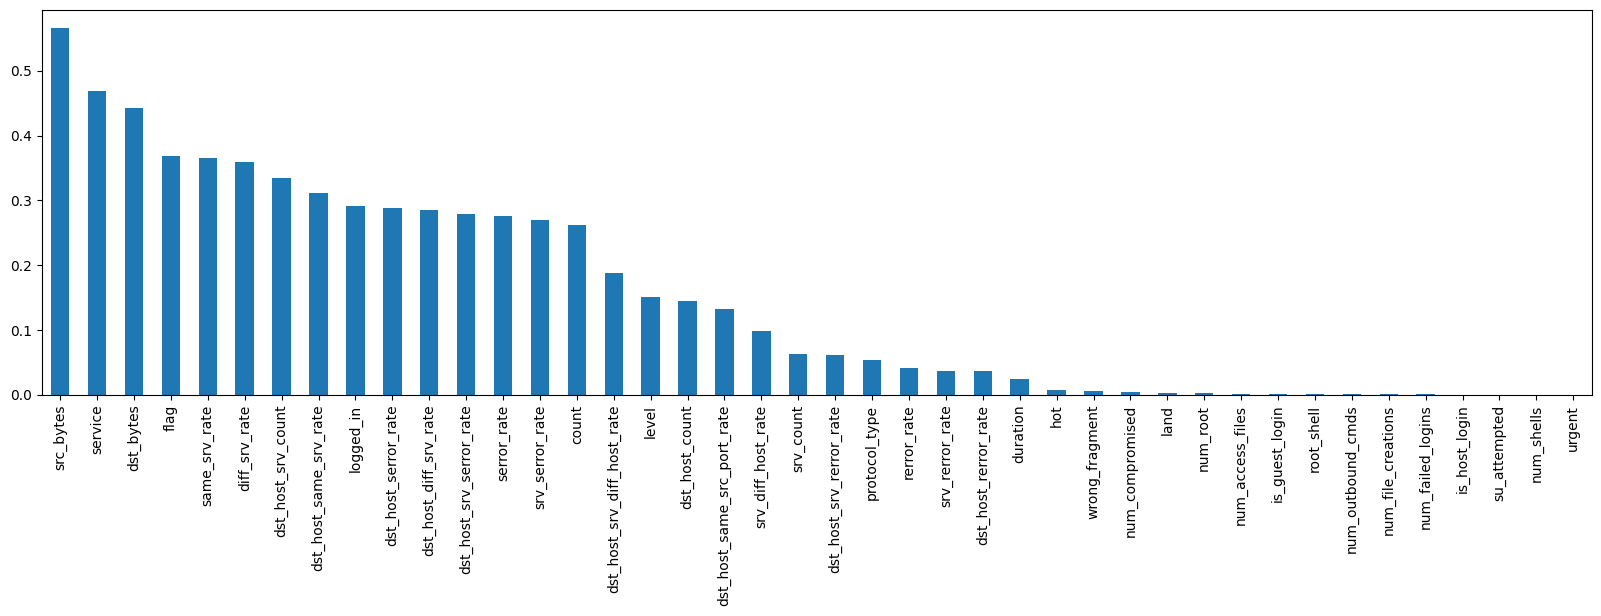

In [29]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5));

In [30]:
Select_features = SelectKBest(mutual_info_classif, k=30)
Select_features.fit(X_train, y_train)
train_index[Select_features.get_support()]

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_root', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

In [31]:
columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate']

#We will continue our model with top 15 features, because dataset is big enough

X_train=X_train[columns]
X_test=X_test[columns]

In [32]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
 # we use only transform in order to prevent data leakage

In [38]:
!pip install memory_profiler
!pip install psutil
from memory_profiler import memory_usage as memory_usage_mp
import gc
import time
import numpy as np
import psutil
def memory_usage_psutil():
    # return the memory usage in MB
    import psutil
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / float(2 ** 20)

def memory_usage():
    samples = []
    for _ in range(5):  # Take 5 samples
        gc.collect()  # Manually trigger garbage collection
        samples.append(memory_usage_psutil())
        time.sleep(1)  # Small delay between samples
    return np.mean(samples)

# LSTM normal data



In [39]:
# Define the model LSTM
import time
import os
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Adjust input shape if needed
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Now you can fit the model
# Measure memory usage during model training
start_time = time.time()
initial_memory = memory_usage()
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
training_time_lstm_normal = time.time() - start_time
final_memory = memory_usage()
memory_used_lstm_normal = final_memory - initial_memory
print(f"Memory used: {memory_used_lstm_normal} MB")

Epoch 1/10
1772/1772 [==============================] - 15s 7ms/step - loss: 0.1281 - accuracy: 0.9541 - val_loss: 0.0847 - val_accuracy: 0.9732
Epoch 2/10
1772/1772 [==============================] - 11s 6ms/step - loss: 0.0887 - accuracy: 0.9697 - val_loss: 0.0767 - val_accuracy: 0.9715
Epoch 3/10
1772/1772 [==============================] - 12s 7ms/step - loss: 0.0771 - accuracy: 0.9728 - val_loss: 0.0651 - val_accuracy: 0.9775
Epoch 4/10
1772/1772 [==============================] - 6s 4ms/step - loss: 0.0707 - accuracy: 0.9737 - val_loss: 0.0584 - val_accuracy: 0.9776
Epoch 5/10
1772/1772 [==============================] - 6s 4ms/step - loss: 0.0642 - accuracy: 0.9749 - val_loss: 0.0558 - val_accuracy: 0.9783
Epoch 6/10
1772/1772 [==============================] - 4s 2ms/step - loss: 0.0623 - accuracy: 0.9760 - val_loss: 0.0541 - val_accuracy: 0.9741
Epoch 7/10
1772/1772 [==============================] - 4s 2ms/step - loss: 0.0597 - accuracy: 0.9763 - val_loss: 0.0535 - val_accura

In [40]:
# Evaluate LSTM model on the original test data
import time
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

y_pred_probs = model.predict(X_test)  # Predict probabilities
y_pred_lstm = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
precision_lstm = precision_score(y_test, y_pred_lstm)
recall_lstm = recall_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm)

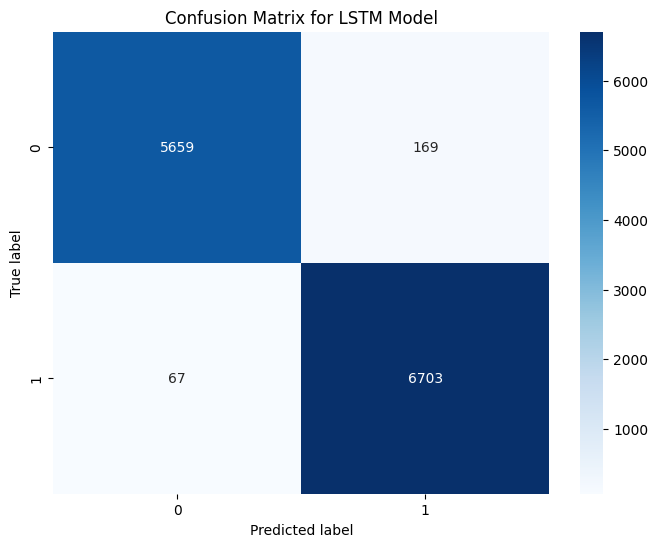

In [41]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lstm)  # Use y_pred_lstm calculated earlier

plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix for LSTM Model')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

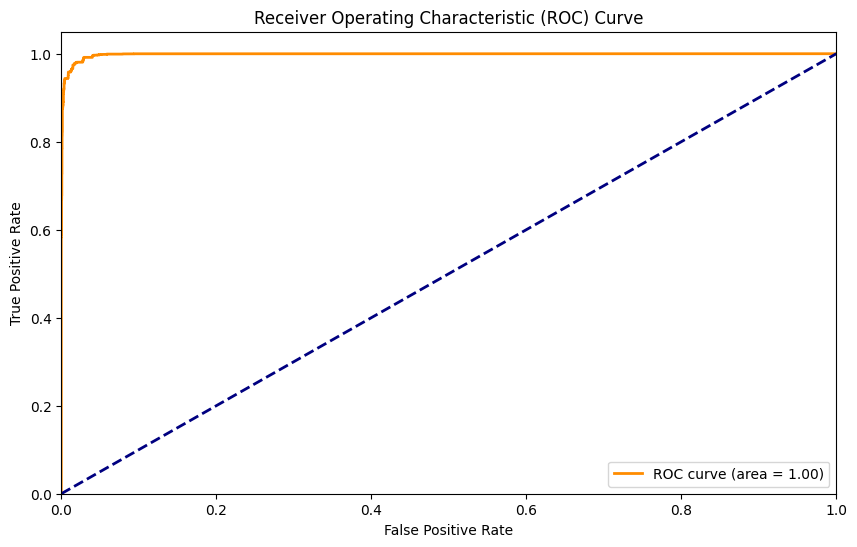

In [42]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)  # Use y_pred_probs calculated earlier
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

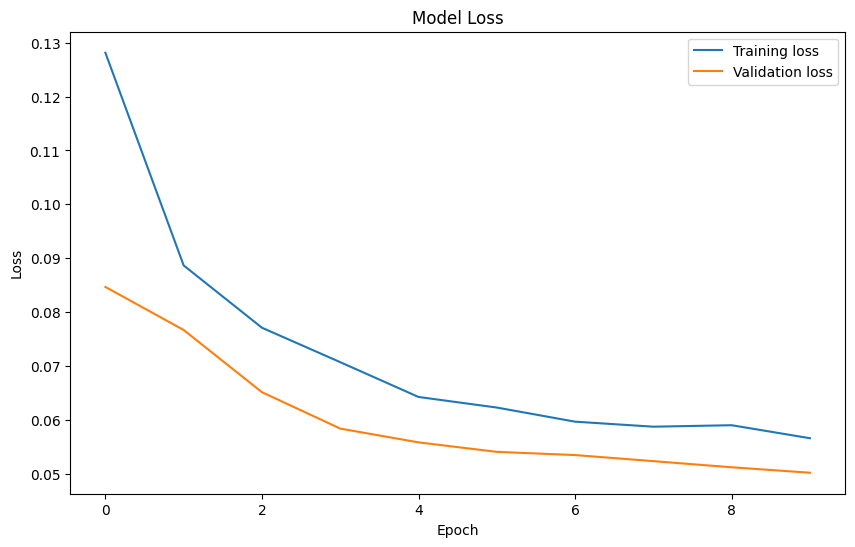

In [43]:
# Training Loss Graph
plt.figure()
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# SVM normal data

In [44]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import svm

# Train SVM model without adversarial data
# Measure memory usage during model training
initial_memory = memory_usage()
start_time = time.time()
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

# Scale the training data - add this block to create X_train_scaled
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Calibrate the SVM model to get probabilities
calibrated_svm = CalibratedClassifierCV(svm_model, method='sigmoid')
calibrated_svm.fit(X_train_scaled, y_train)

training_time_svm_normal = time.time() - start_time
final_memory = memory_usage()
memory_used_svm_normal = final_memory - initial_memory
print(f"Memory used: {memory_used_svm_normal} MB")

Memory used: 18.9375 MB


In [45]:
X_test_scaled = scaler.transform(X_test) # Use the same scaler fitted on the training data
# Get predicted probabilities
y_prob = calibrated_svm.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [46]:
# Predict the probabilities and labels
#y_pred_prob = svm_model.predict_proba(X_test_scaled)[:, 1]
y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

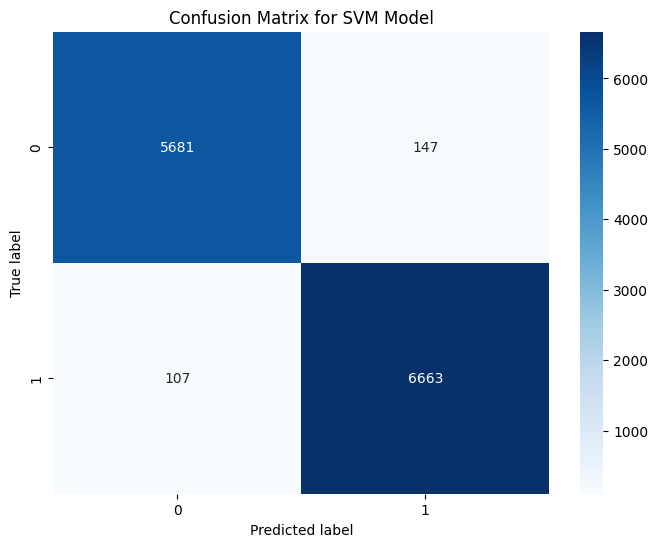

In [47]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix for SVM Model')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

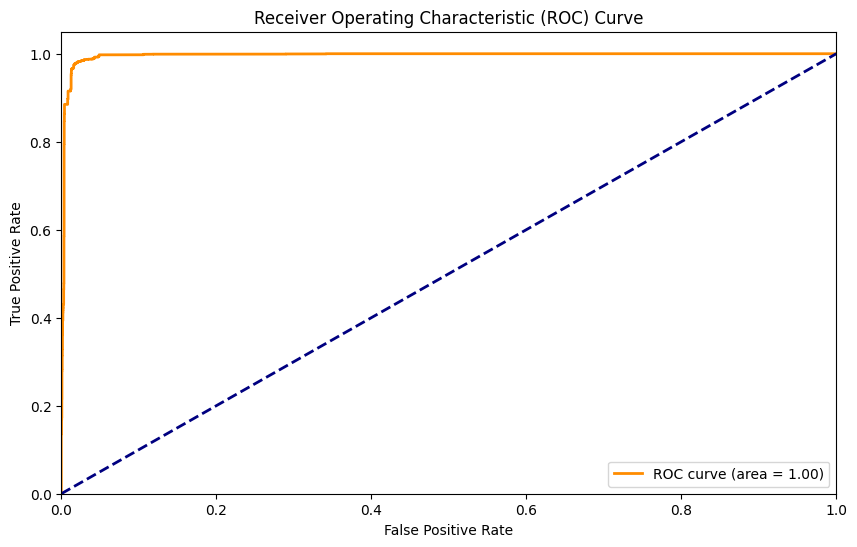

In [48]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# DNN normal data

In [49]:
# Define DNN model
dnn_model = Sequential()
dnn_model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(64, activation='relu'))
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the DNN model
# Measure memory usage during model training
initial_memory = memory_usage()
start_time = time.time()
dnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
training_time_dnn_normal = time.time() - start_time
final_memory = memory_usage()
memory_used_dnn_normal = final_memory - initial_memory
print(f"Memory used: {memory_used_dnn_normal} MB")


Epoch 1/10
1772/1772 [==============================] - 12s 6ms/step - loss: 0.1047 - accuracy: 0.9641 - val_loss: 0.0770 - val_accuracy: 0.9771
Epoch 2/10
1772/1772 [==============================] - 5s 3ms/step - loss: 0.0778 - accuracy: 0.9725 - val_loss: 0.0647 - val_accuracy: 0.9779
Epoch 3/10
1772/1772 [==============================] - 7s 4ms/step - loss: 0.0666 - accuracy: 0.9744 - val_loss: 0.0583 - val_accuracy: 0.9793
Epoch 4/10
1772/1772 [==============================] - 5s 3ms/step - loss: 0.0610 - accuracy: 0.9757 - val_loss: 0.0532 - val_accuracy: 0.9802
Epoch 5/10
1772/1772 [==============================] - 5s 3ms/step - loss: 0.0588 - accuracy: 0.9765 - val_loss: 0.0545 - val_accuracy: 0.9776
Epoch 6/10
1772/1772 [==============================] - 7s 4ms/step - loss: 0.0566 - accuracy: 0.9767 - val_loss: 0.0529 - val_accuracy: 0.9786
Epoch 7/10
1772/1772 [==============================] - 5s 3ms/step - loss: 0.0557 - accuracy: 0.9769 - val_loss: 0.0511 - val_accuracy

In [50]:
# Evaluate DNN model on the original test data
y_pred_dnn = (dnn_model.predict(X_test) > 0.5).astype("int32")
accuracy_dnn = accuracy_score(y_test, y_pred_dnn)
precision_dnn = precision_score(y_test, y_pred_dnn)
recall_dnn = recall_score(y_test, y_pred_dnn)
f1_dnn = f1_score(y_test, y_pred_dnn)

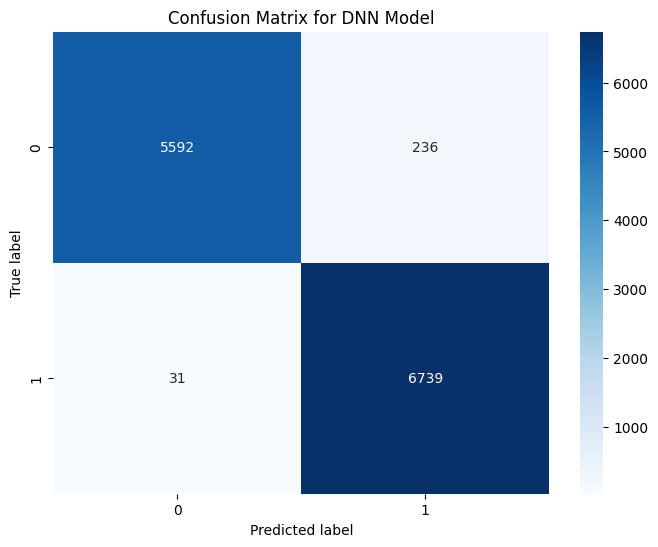

In [51]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dnn)

plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix for DNN Model')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [52]:
# Predict the probabilities
y_pred_prob = dnn_model.predict(X_test)

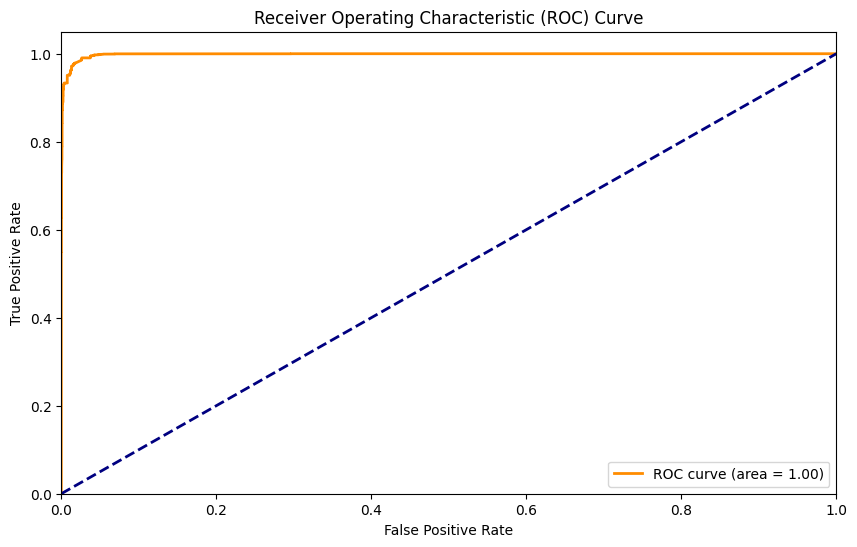

In [53]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

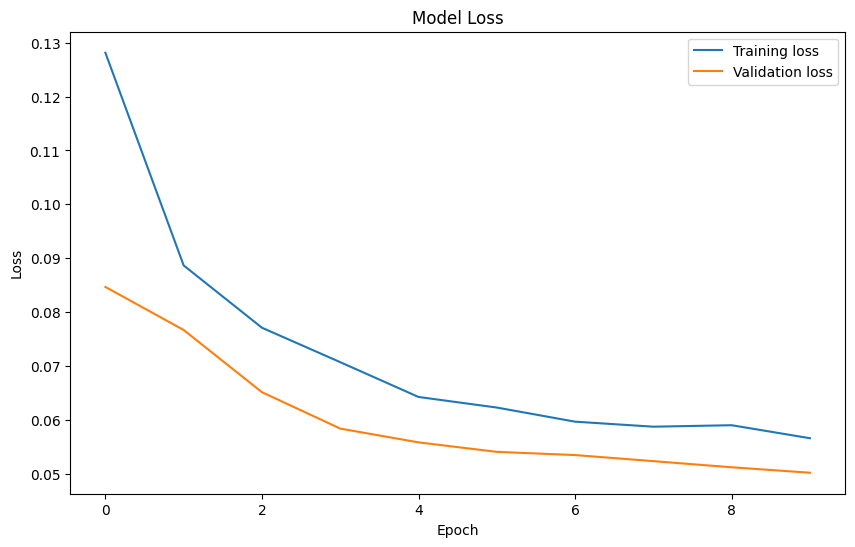

In [54]:
# Plot training & validation loss values
plt.figure()
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# CNN normal data

In [55]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Reshape data for CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
# Measure memory usage during model training
initial_memory = memory_usage()
start_time = time.time()
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=64, validation_data=(X_test_cnn, y_test))
training_time_cnn_normal = time.time() - start_time
final_memory = memory_usage()
memory_used_cnn_normal = final_memory - initial_memory
print(f"Memory used: {memory_used_cnn_normal} MB")



Epoch 1/10
1772/1772 [==============================] - 15s 8ms/step - loss: 0.1134 - accuracy: 0.9614 - val_loss: 0.0802 - val_accuracy: 0.9686
Epoch 2/10
1772/1772 [==============================] - 9s 5ms/step - loss: 0.0774 - accuracy: 0.9724 - val_loss: 0.0657 - val_accuracy: 0.9779
Epoch 3/10
1772/1772 [==============================] - 9s 5ms/step - loss: 0.0680 - accuracy: 0.9742 - val_loss: 0.0612 - val_accuracy: 0.9774
Epoch 4/10
1772/1772 [==============================] - 15s 8ms/step - loss: 0.0630 - accuracy: 0.9749 - val_loss: 0.0576 - val_accuracy: 0.9766
Epoch 5/10
1772/1772 [==============================] - 9s 5ms/step - loss: 0.0611 - accuracy: 0.9757 - val_loss: 0.0596 - val_accuracy: 0.9736
Epoch 6/10
1772/1772 [==============================] - 7s 4ms/step - loss: 0.0597 - accuracy: 0.9757 - val_loss: 0.0574 - val_accuracy: 0.9786
Epoch 7/10
1772/1772 [==============================] - 9s 5ms/step - loss: 0.0583 - accuracy: 0.9768 - val_loss: 0.0556 - val_accurac

In [56]:
y_pred_cnn = (cnn_model.predict(X_test_cnn) > 0.5).astype("int32")
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
precision_cnn = precision_score(y_test, y_pred_cnn)
recall_cnn = recall_score(y_test, y_pred_cnn)
f1_cnn = f1_score(y_test, y_pred_cnn)

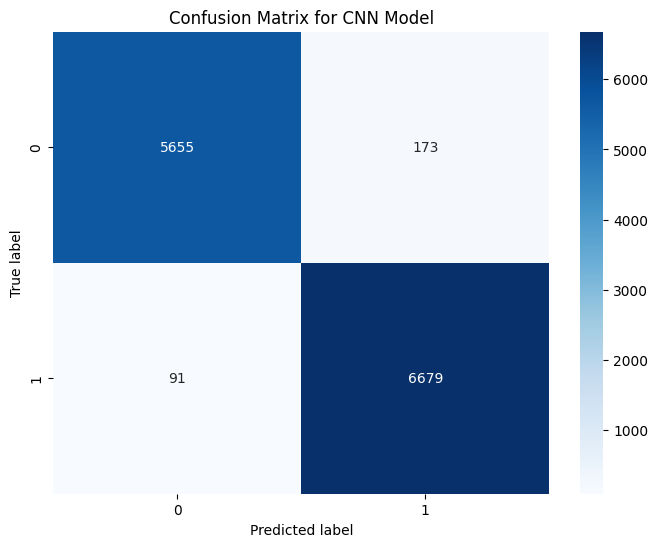

In [57]:
# Predict the labels
y_pred = (cnn_model.predict(X_test_cnn) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix for CNN Model')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


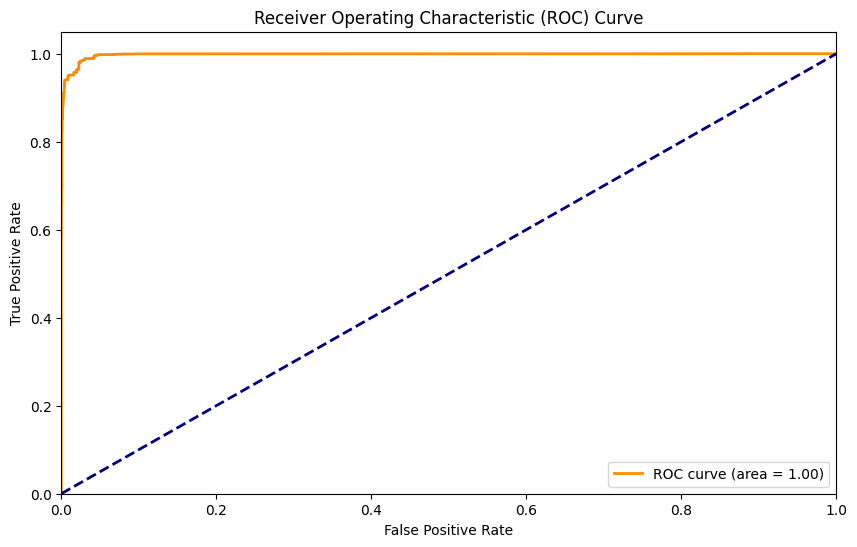

In [58]:
# Predict the probabilities
y_pred_prob = cnn_model.predict(X_test_cnn)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


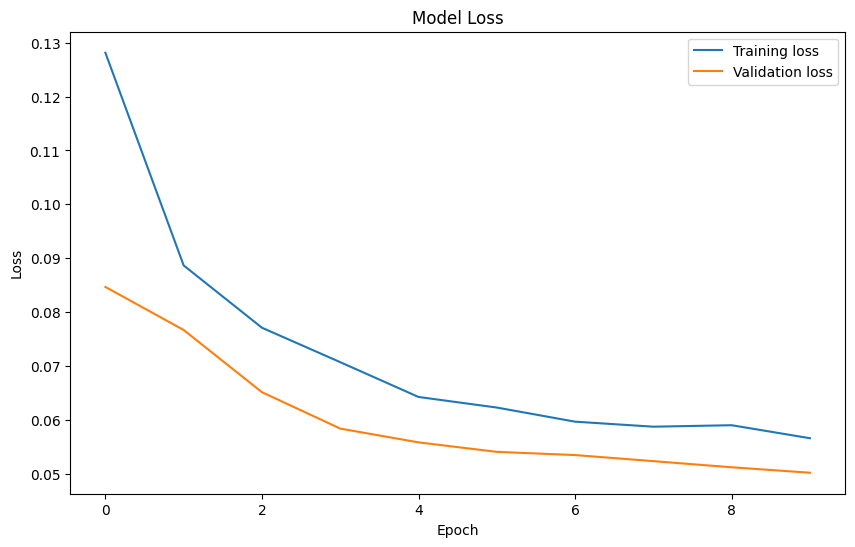

In [59]:
# Plot training & validation loss values
plt.figure()
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


# LSTM adv Data

In [ ]:
# Disable eager execution if necessary
tf.compat.v1.disable_eager_execution()

# Load and preprocess your data as usual
# Assuming X_train, X_test, y_train, y_test are already defined

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1), activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Wrap your model using ART's KerasClassifier
classifier = KerasClassifier(model=model, clip_values=(0, 1))

# Reshape the input data to 3D format [samples, timesteps, features]
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Generate adversarial examples
attack = FastGradientMethod(estimator=classifier, eps=0.3)
X_train_adv = attack.generate(x=X_train_reshaped)
X_test_adv = attack.generate(x=X_test_reshaped)

# Augment training data with adversarial examples
X_train_augmented = np.concatenate((X_train_reshaped, X_train_adv))
y_train_augmented = np.concatenate((y_train, y_train))  # Assuming the labels remain the same

# Retrain the LSTM model with augmented data
# Measure memory usage during model training
initial_memory = memory_usage()
start_time = time.time()
history = model.fit(X_train_augmented, y_train_augmented, epochs=10, batch_size=64, validation_data=(X_test_reshaped, y_test))
training_time_lstm_adv = time.time() - start_time
final_memory = memory_usage()
memory_used_lstm_adv = final_memory - initial_memory
print(f"Memory used: {memory_used_lstm_adv} MB")

Train on 226748 samples, validate on 12598 samples
Epoch 1/10
208064/226748 [==========================>...] - ETA: 12s - loss: 0.1447 - accuracy: 0.9457

In [57]:
# Evaluate the LSTM model on adversarial test data
y_pred_lstm_adv = (model.predict(X_test_adv) > 0.5).astype("int32")
accuracy_lstm_adv = accuracy_score(y_test, y_pred_lstm_adv)
precision_lstm_adv = precision_score(y_test, y_pred_lstm_adv)
recall_lstm_adv = recall_score(y_test, y_pred_lstm_adv)
f1_lstm_adv = f1_score(y_test, y_pred_lstm_adv)


In [ ]:
# Predict the labels
y_pred = (model.predict(X_test_reshaped) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix for LSTM Model')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [ ]:
# Predict the probabilities
y_pred_prob = model.predict(X_test_reshaped)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Plot training & validation loss values
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# SVM adv Data

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

# Assuming you have preprocessed and scaled your training and test data
# If not, here's a brief overview:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Train SVM model
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

# Reshape the adversarial test data to 2D for SVM
X_test_adv_2D = X_test_adv.reshape(X_test_adv.shape[0], -1)



# Evaluate SVM model on reshaped adversarial examples
# Measure memory usage during model training
initial_memory = memory_usage()
start_time = time.time()
y_pred_adv_svm = svm_model.predict(X_test_adv_2D)
training_time_svm_adv = time.time() - start_time
final_memory = memory_usage()
memory_used_svm_adv = final_memory - initial_memory
print(f"Memory used: {memory_used_svm_adv} MB")

In [ ]:
y_pred_svm_adv = svm_model.predict(X_test_adv_2D)
accuracy_svm_adv = accuracy_score(y_test, y_pred_svm_adv)
precision_svm_adv = precision_score(y_test, y_pred_svm_adv)
recall_svm_adv = recall_score(y_test, y_pred_svm_adv)
f1_svm_adv = f1_score(y_test, y_pred_svm_adv)

In [ ]:
# Compute and plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_adv_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM Adversarial Examples')
plt.show()

# DNN adv Data

In [64]:
# Assuming you have generated adversarial training data X_train_adv and corresponding labels y_train_adv
# If X_train_adv is not yet generated, you should generate it first

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define DNN model
dnn_model_adv = Sequential()
dnn_model_adv.add(Dense(128, input_shape=(X_train_adv.shape[1],), activation='relu'))
dnn_model_adv.add(Dropout(0.2))
dnn_model_adv.add(Dense(64, activation='relu'))
dnn_model_adv.add(Dropout(0.2))
dnn_model_adv.add(Dense(1, activation='sigmoid'))

# Compile the model
dnn_model_adv.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape adversarial training data for DNN
X_train_adv_dnn = X_train_adv.reshape(X_train_adv.shape[0], -1)

# Train the DNN model using adversarial training data
# Measure memory usage during model training
initial_memory = memory_usage()
start_time = time.time()
history = dnn_model_adv.fit(X_train_adv_dnn, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
training_time_dnn_adv = time.time() - start_time
final_memory = memory_usage()
memory_used_dnn_adv = final_memory - initial_memory
print(f"Memory used: {memory_used_dnn_adv} MB")

Train on 113374 samples, validate on 12598 samples
Epoch 1/10
113374/113374 [==============================] - 7s 59us/sample - loss: 0.1079 - accuracy: 0.9623 - val_loss: 0.1151 - val_accuracy: 0.9608
Epoch 2/10
113374/113374 [==============================] - 4s 38us/sample - loss: 0.0764 - accuracy: 0.9723 - val_loss: 0.1659 - val_accuracy: 0.9475
Epoch 3/10
113374/113374 [==============================] - 4s 37us/sample - loss: 0.0664 - accuracy: 0.9751 - val_loss: 0.1780 - val_accuracy: 0.9290
Epoch 4/10
113374/113374 [==============================] - 6s 49us/sample - loss: 0.0606 - accuracy: 0.9764 - val_loss: 0.2137 - val_accuracy: 0.9151
Epoch 5/10
113374/113374 [==============================] - 5s 42us/sample - loss: 0.0578 - accuracy: 0.9766 - val_loss: 0.2209 - val_accuracy: 0.9058
Epoch 6/10
113374/113374 [==============================] - 4s 36us/sample - loss: 0.0557 - accuracy: 0.9776 - val_loss: 0.2484 - val_accuracy: 0.9082
Epoch 7/10
113374/113374 [=================

In [ ]:
y_pred_dnn_adv = (dnn_model_adv.predict(X_test) > 0.5).astype("int32")
accuracy_dnn_adv = accuracy_score(y_test, y_pred_dnn_adv)
precision_dnn_adv = precision_score(y_test, y_pred_dnn_adv)
recall_dnn_adv = recall_score(y_test, y_pred_dnn_adv)
f1_dnn_adv = f1_score(y_test, y_pred_dnn_adv)

In [ ]:
# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for DNN Model with Adversarial Training')
plt.show()

In [ ]:
# Compute and plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for DNN Model with Adversarial Training')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Plot training & validation loss values
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

# CNN adv Data

In [ ]:
X_train_adv_cnn = X_train_adv.reshape((X_train_adv.shape[0], X_train_adv.shape[1], 1))

# Reshape test data for CNN (if not already done)
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define CNN model
cnn_model_adv = Sequential()
cnn_model_adv.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_adv_cnn.shape[1], 1)))
cnn_model_adv.add(MaxPooling1D(pool_size=2))
cnn_model_adv.add(Flatten())
cnn_model_adv.add(Dense(128, activation='relu'))
cnn_model_adv.add(Dropout(0.2))
cnn_model_adv.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model_adv.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model using adversarial training data
# Measure memory usage during model training
initial_memory = memory_usage()
start_time = time.time()
history = cnn_model_adv.fit(X_train_adv_cnn, y_train, epochs=10, batch_size=64, validation_data=(X_test_cnn, y_test))
training_time_cnn_adv = time.time() - start_time
final_memory = memory_usage()
memory_used_cnn_adv = final_memory - initial_memory
print(f"Memory used: {memory_used_cnn_adv} MB")

In [ ]:
y_pred_cnn_adv = (cnn_model_adv.predict(X_test_cnn) > 0.5).astype("int32")
accuracy_cnn_adv = accuracy_score(y_test, y_pred_cnn_adv)
precision_cnn_adv = precision_score(y_test, y_pred_cnn_adv)
recall_cnn_adv = recall_score(y_test, y_pred_cnn_adv)
f1_cnn_adv = f1_score(y_test, y_pred_cnn_adv)

In [ ]:
# Predict on test data
y_pred_prob = cnn_model_adv.predict(X_test_cnn)  # Get prediction probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary labels

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for CNN Model with Adversarial Training')
plt.show()

In [ ]:
# Compute and plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for CNN Model with Adversarial Training')
plt.legend(loc='lower right')
plt.show()

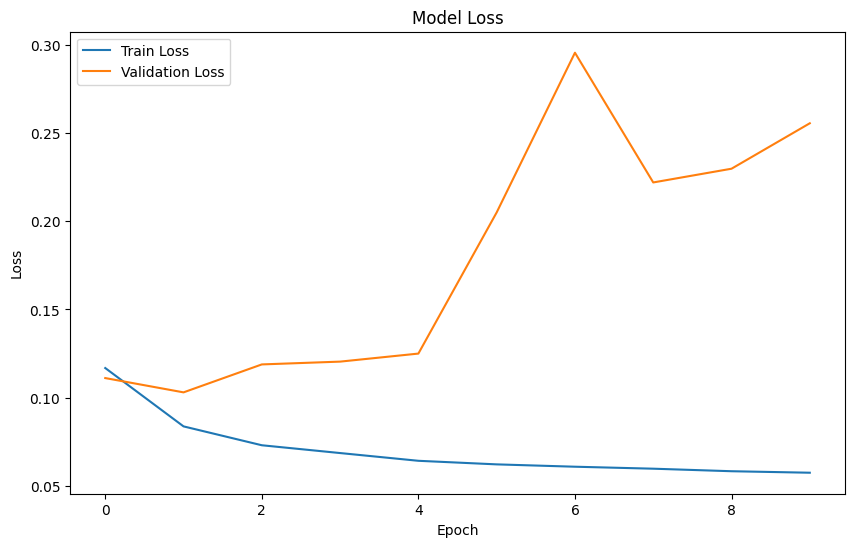

In [73]:
# Plot training & validation loss values
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

# Importing new Data

In [ ]:
!pip install pyarrow
import pandas as pd

df_2 = pd.read_parquet("/content/drive/MyDrive/archive-5/UNSW_NB15_training-set.parquet")
df_2.head()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif
import matplotlib.pyplot as plt

In [ ]:
class Preprocess:
    def __init__(self,train_file_path,test_file_path):
        self.train_df = pd.read_parquet(train_file_path)
        self.test_df = pd.read_parquet(test_file_path)
        self.lb_ub={}
    def standardization(self,dataframe,col_name):
        mean_val = dataframe[col_name].mean()
        std_val = dataframe[col_name].std()
        dataframe[col_name]=((dataframe[col_name]-mean_val)/std_val)

    def remove_outlier(self,data_frame,column_name,isTest=False,verbose=0):
        if isTest:
            data_frame.loc[data_frame[column_name] > self.lb_ub[column_name][1] , column_name] = self.lb_ub[column_name][1]
            data_frame.loc[data_frame[column_name] < self.lb_ub[column_name][0] , column_name] = self.lb_ub[column_name][0]
            return
        l = data_frame[column_name].min()
        r = data_frame[column_name].max()
        q1 = data_frame[column_name].quantile(0.25)
        q3 = data_frame[column_name].quantile(0.75)
        iqr = q3 -q1
        lb = q1-3*iqr
        ub = q3+3*iqr

        num_outliers = data_frame[(data_frame[column_name]<lb) | (data_frame[column_name]>ub)].shape[0]

        data_frame.loc[data_frame[column_name] > ub , column_name] = ub
        data_frame.loc[data_frame[column_name] < lb , column_name] = lb
        self.lb_ub[column_name]=(lb,ub)
        if verbose == 1:
            print("Min Value= ",l)
            print("Lower Bound = ",self.lb)
            print("Q1 = ",q1)
            print("Q2 = ",q3)
            print("Upper Bound = ", self.ub)
            print("Max Value = ",r)
            print("Number of Outliers = ",num_outliers)

    def get_correlated_features(self,correlation_matrix, threshold=0.8):
        num_features = correlation_matrix.shape[0]
        correlated_features = set()

        for i in range(num_features):
            for j in range(i + 1, num_features):
                correlation = correlation_matrix[i, j]
                if correlation >= threshold:
                    correlated_features.add((i,j))

        return correlated_features

    def train_set_preprocess(self):
        train_mal_df = self.train_df[self.train_df['label'] == 1]
        train_normal_df = self.train_df[self.train_df['label'] == 0]

        #outlier clipping
        col = 'dur'
        self.remove_outlier(self.train_df,col)

        #max-value clipping
        self.cols_muls = {'spkts': 1.2, 'sloss': 1.2, 'dloss': 1.2}
        self.cols_maxvals = {}
        for col, multiplier in self.cols_muls.items():
            self.cols_maxvals[col] = train_normal_df[col].max()
            self.train_df.loc[self.train_df[col] > self.cols_maxvals[col], col] = (self.cols_maxvals[col] * multiplier)

        #clipping to 1
        self.columns_to_limit = ['is_ftp_login', 'ct_ftp_cmd']
        for col in self.columns_to_limit:
            self.train_df.loc[self.train_df[col] > 1, col] = 1

        #drop columns
        self.columns_to_drop = ['swin', 'stcpb', 'dtcpb', 'dwin', 'attack_cat']
        self.train_df = self.train_df.drop(columns=self.columns_to_drop, axis=1)

        #categical data handling
        col = 'proto'
        valid_protos = ['tcp', 'udp', 'arp', 'ospf', 'igmp', 'icmp', 'rtp']
        self.train_df[col] = self.train_df[col].apply(lambda x: x if x in valid_protos else 'm')

        valid_protos = ['igmp', 'icmp', 'rtp']
        self.train_df[col] = self.train_df[col].apply(lambda x: x if x not in valid_protos else 'n')

        self.train_df = pd.get_dummies(self.train_df, columns=[col], prefix='proto', drop_first=False)

        label_encoder = LabelEncoder()
        col = 'service'
        self.train_df[col] = label_encoder.fit_transform(self.train_df[col])

        col = 'state'
        temp = ['RST', 'ECO', 'PAR', 'URN', 'no']
        self.train_df[col] = self.train_df[col].apply(lambda x: x if x not in temp else 'm')
        self.train_df[col] = label_encoder.fit_transform(self.train_df[col])

        self.train_df = self.train_df.replace({True: 0, False: 1})

        #feature selection
        self.X_train = self.train_df.drop('label', axis=1)
        self.y_train = self.train_df['label']

        #remove constant features
        var_thres = VarianceThreshold(threshold = 0)
        var_thres.fit(self.X_train)
        self.dropable_const_cols = self.X_train.columns[[not col for col in var_thres.get_support()]]
        self.X_train = self.X_train.drop(self.dropable_const_cols,axis=1)

        #remove correlated features
        correlation_matrix = np.corrcoef(self.X_train, rowvar=False)
        self.correlated_features = [self.X_train.columns[x[0]] for x in self.get_correlated_features(correlation_matrix,0.95) ]
        self.X_train=self.X_train.drop(self.correlated_features,axis=1)

        #standardization
        for col in self.X_train.columns:
            self.standardization(self.X_train,col)

    def test_set_preprocess(self):
        test_mal_df = self.test_df[self.test_df['label'] == 1]
        test_normal_df = self.test_df[self.test_df['label'] == 0]

        #outlier clipping
        col = 'dur'
        self.remove_outlier(self.test_df,col,True)

        #max-value clipping
        for col, multiplier in self.cols_muls.items():
            self.test_df.loc[self.test_df[col] > self.cols_maxvals[col], col] = (self.cols_maxvals[col] * multiplier)

        #clipping to 1
        for col in self.columns_to_limit:
            self.test_df.loc[self.test_df[col] > 1, col] = 1

        #drop columns
        self.test_df = self.test_df.drop(columns=self.columns_to_drop, axis=1)

        #categical data handling
        col = 'proto'
        valid_protos = ['tcp', 'udp', 'arp', 'ospf', 'igmp', 'icmp', 'rtp']
        self.test_df[col] = self.test_df[col].apply(lambda x: x if x in valid_protos else 'm')

        valid_protos = ['igmp', 'icmp', 'rtp']
        self.test_df[col] = self.test_df[col].apply(lambda x: x if x not in valid_protos else 'n')

        #one hot encoding
        self.test_df = pd.get_dummies(self.test_df, columns=[col], prefix='proto', drop_first=False)

        label_encoder = LabelEncoder()
        col = 'service'
        self.test_df[col] = label_encoder.fit_transform(self.test_df[col])

        col = 'state'
        temp = ['RST', 'ECO', 'PAR', 'URN', 'no']
        self.test_df[col] = self.test_df[col].apply(lambda x: x if x not in temp else 'm')
        self.test_df[col] = label_encoder.fit_transform(self.test_df[col])

        self.test_df = self.test_df.replace({True: 0, False: 1})

        #feature selection
        self.X_test = self.test_df.drop('label', axis=1)
        self.y_test = self.test_df['label']

        #remove constant features
        self.X_test = self.X_test.drop(self.dropable_const_cols,axis=1)

        #remove correlated features
        self.X_test=self.X_test.drop(self.correlated_features,axis=1)

        #standardization
        for col in self.X_test.columns:
            self.standardization(self.X_test,col)

In [ ]:
train_file_path = '/content/drive/MyDrive/archive-5/UNSW_NB15_training-set.parquet'
test_file_path = "/content/drive/MyDrive/archive-5/UNSW_NB15_testing-set.parquet"

In [ ]:
processed = Preprocess(train_file_path,test_file_path)
processed.train_set_preprocess()
processed.test_set_preprocess()

In [79]:
X_train_new = processed.X_train
y_train_new = processed.y_train

X_test_new = processed.X_test
y_test_new = processed.y_test

In [80]:
X_train_new.columns

Index(['dur', 'service', 'state', 'spkts', 'sbytes', 'dbytes', 'rate', 'sload',
       'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'tcprtt',
       'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports', 'proto_arp',
       'proto_m', 'proto_n', 'proto_ospf', 'proto_tcp', 'proto_udp'],
      dtype='object')

In [81]:
scaler = StandardScaler()

X_train_new_scl = scaler.fit_transform(X_train_new)
X_test_new_scl = scaler.transform(X_test_new)
 # we use only transform in order to prevent data leakage

# LSTM new Data

In [82]:
# Define the model LSTM
import time
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_new_scl.shape[1],)))  # Adjust input shape if needed
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Now you can fit the model
# Measure memory usage during model training
start_time = time.time()
initial_memory = memory_usage()
history = model.fit(X_train_new_scl, y_train_new, epochs=10, batch_size=64, validation_data=(X_test_new_scl, y_test_new))
training_time_lstm_new = time.time() - start_time
final_memory = memory_usage()
memory_used_lstm_new = final_memory - initial_memory
print(f"Memory used: {memory_used_lstm_new} MB")

Train on 82332 samples, validate on 175341 samples
Epoch 1/10
82332/82332 [==============================] - 6s 74us/sample - loss: 0.3060 - accuracy: 0.8448 - val_loss: 0.3110 - val_accuracy: 0.8335
Epoch 2/10
82332/82332 [==============================] - 6s 77us/sample - loss: 0.2341 - accuracy: 0.8844 - val_loss: 0.2889 - val_accuracy: 0.8399
Epoch 3/10
82332/82332 [==============================] - 5s 63us/sample - loss: 0.2174 - accuracy: 0.8936 - val_loss: 0.3067 - val_accuracy: 0.8360
Epoch 4/10
82332/82332 [==============================] - 7s 79us/sample - loss: 0.2059 - accuracy: 0.9008 - val_loss: 0.3019 - val_accuracy: 0.8430
Epoch 5/10
82332/82332 [==============================] - 6s 69us/sample - loss: 0.2002 - accuracy: 0.9041 - val_loss: 0.2678 - val_accuracy: 0.8552
Epoch 6/10
82332/82332 [==============================] - 5s 66us/sample - loss: 0.1946 - accuracy: 0.9076 - val_loss: 0.2627 - val_accuracy: 0.8642
Epoch 7/10
82332/82332 [==============================]

In [ ]:
# Evaluate LSTM model on the original test data
import time
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

y_pred_probs_new = model.predict(X_test_new_scl)  # Predict probabilities
y_pred_lstm_new = (y_pred_probs_new > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)
accuracy_lstm_new = accuracy_score(y_test_new, y_pred_lstm_new)
precision_lstm_new = precision_score(y_test_new, y_pred_lstm_new)
recall_lstm_new = recall_score(y_test_new, y_pred_lstm_new)
f1_lstm_new = f1_score(y_test_new, y_pred_lstm_new)

In [ ]:
# Predict on test data
y_pred_prob = model.predict(X_test_new_scl)  # Get prediction probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary labels


In [ ]:
# Compute and plot confusion matrix
cm = confusion_matrix(y_test_new, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Dense Model')
plt.show()


In [ ]:
# Compute and plot ROC curve
fpr, tpr, _ = roc_curve(y_test_new, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Dense Model')
plt.legend(loc='lower right')
plt.show()

# SVM new Data

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

# Train SVM model without adversarial data
# Measure memory usage during model training
initial_memory = memory_usage()
start_time = time.time()
svm_model = svm.SVC()
svm_model.fit(X_train_new_scl, y_train_new)
training_time_svm_new = time.time() - start_time
final_memory = memory_usage()
memory_used_svm_new = final_memory - initial_memory
print(f"Memory used: {memory_used_svm_new} MB")

In [ ]:
y_pred_svm_new = svm_model.predict(X_test_new_scl)
accuracy_svm_new = accuracy_score(y_test_new, y_pred_svm_new)
precision_svm_new = precision_score(y_test_new, y_pred_svm_new)
recall_svm_new = recall_score(y_test_new, y_pred_svm_new)
f1_svm_new = f1_score(y_test_new, y_pred_svm_new)

In [ ]:
# Compute and plot confusion matrix
cm = confusion_matrix(y_test_new, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM Model')
plt.show()

# DNN new Data

In [ ]:
# Define DNN model
dnn_model = Sequential()
dnn_model.add(Dense(128, input_shape=(X_train_new_scl.shape[1],), activation='relu'))
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(64, activation='relu'))
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the DNN model
# Measure memory usage during model training
initial_memory = memory_usage()
start_time = time.time()
history = dnn_model.fit(X_train_new_scl, y_train_new, epochs=10, batch_size=64, validation_data=(X_test_new_scl, y_test_new))
training_time_dnn_new = time.time() - start_time
final_memory = memory_usage()
memory_used_dnn_new = final_memory - initial_memory
print(f"Memory used: {memory_used_dnn_new} MB")

In [ ]:
# Evaluate DNN model on the original test data
y_pred_dnn_new = (dnn_model.predict(X_test_new) > 0.5).astype("int32")
accuracy_dnn_new = accuracy_score(y_test_new, y_pred_dnn_new)
precision_dnn_new = precision_score(y_test_new, y_pred_dnn_new)
recall_dnn_new = recall_score(y_test_new, y_pred_dnn_new)
f1_dnn_new = f1_score(y_test_new, y_pred_dnn_new)

In [ ]:
# Predict on test data
y_pred_prob = dnn_model.predict(X_test_new_scl)  # Get prediction probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary labels

In [ ]:
# Compute and plot confusion matrix
cm = confusion_matrix(y_test_new, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for DNN Model')
plt.show()

In [ ]:
# Compute and plot ROC curve
fpr, tpr, _ = roc_curve(y_test_new, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for DNN Model')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Plot training & validation loss values
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

# CNN new Data

In [96]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Reshape data for CNN
X_train_cnn_new = X_train_new_scl.reshape((X_train_new_scl.shape[0], X_train_new_scl.shape[1], 1))
X_test_cnn_new = X_test_new_scl.reshape((X_test_new_scl.shape[0], X_test_new_scl.shape[1], 1))

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn_new.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
# Measure memory usage during model training
initial_memory = memory_usage()
start_time = time.time()
history = cnn_model.fit(X_train_cnn_new, y_train_new, epochs=10, batch_size=64, validation_data=(X_test_cnn_new, y_test_new))
training_time_cnn_new = time.time() - start_time
final_memory = memory_usage()
memory_used_cnn_new = final_memory - initial_memory
print(f"Memory used: {memory_used_cnn_new} MB")

Train on 82332 samples, validate on 175341 samples
Epoch 1/10
82332/82332 [==============================] - 13s 163us/sample - loss: 0.2662 - accuracy: 0.8662 - val_loss: 0.3027 - val_accuracy: 0.8202
Epoch 2/10
82332/82332 [==============================] - 13s 160us/sample - loss: 0.2169 - accuracy: 0.8948 - val_loss: 0.2985 - val_accuracy: 0.8278
Epoch 3/10
82332/82332 [==============================] - 14s 164us/sample - loss: 0.2047 - accuracy: 0.9017 - val_loss: 0.2741 - val_accuracy: 0.8533
Epoch 4/10
82332/82332 [==============================] - 13s 162us/sample - loss: 0.1962 - accuracy: 0.9065 - val_loss: 0.2731 - val_accuracy: 0.8645
Epoch 5/10
82332/82332 [==============================] - 13s 157us/sample - loss: 0.1906 - accuracy: 0.9093 - val_loss: 0.2582 - val_accuracy: 0.8674
Epoch 6/10
82332/82332 [==============================] - 13s 154us/sample - loss: 0.1874 - accuracy: 0.9108 - val_loss: 0.2497 - val_accuracy: 0.8713
Epoch 7/10
82332/82332 [===================

In [ ]:
y_pred_cnn_new = (cnn_model.predict(X_test_cnn_new) > 0.5).astype("int32")
accuracy_cnn_new = accuracy_score(y_test_new, y_pred_cnn_new)
precision_cnn_new = precision_score(y_test_new, y_pred_cnn_new)
recall_cnn_new = recall_score(y_test_new, y_pred_cnn_new)
f1_cnn_new = f1_score(y_test_new, y_pred_cnn_new)

In [ ]:
# Predict on test data
y_pred_prob = cnn_model.predict(X_test_cnn_new)  # Get prediction probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary labels


In [ ]:
# Compute and plot confusion matrix
cm = confusion_matrix(y_test_new, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for CNN Model')
plt.show()

In [ ]:
# Compute and plot ROC curve
fpr, tpr, _ = roc_curve(y_test_new, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for CNN Model')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Plot training & validation loss values
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

# LSTM new adv Data

In [ ]:
# Disable eager execution if necessary
tf.compat.v1.disable_eager_execution()

# Load and preprocess your data as usual
# Assuming X_train, X_test, y_train, y_test are already defined

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_new_scl.shape[1], 1), activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Wrap your model using ART's KerasClassifier
classifier = KerasClassifier(model=model, clip_values=(0, 1))

# Reshape the input data to 3D format [samples, timesteps, features]
X_train_reshaped_new = X_train_new_scl.reshape((X_train_new_scl.shape[0], X_train_new_scl.shape[1], 1))
X_test_reshaped_new = X_test_new_scl.reshape((X_test_new_scl.shape[0], X_test_new_scl.shape[1], 1))

# Generate adversarial examples
attack = FastGradientMethod(estimator=classifier, eps=0.3)
X_train_adv_new = attack.generate(x=X_train_reshaped_new)
X_test_adv_new = attack.generate(x=X_test_reshaped_new)

# Augment training data with adversarial examples
X_train_augmented = np.concatenate((X_train_reshaped_new, X_train_adv_new))
y_train_augmented = np.concatenate((y_train_new, y_train_new))  # Assuming the labels remain the same



In [ ]:
# Retrain the LSTM model with augmented data
# Measure memory usage during model training
initial_memory = memory_usage()
start_time = time.time()
history = model.fit(X_train_augmented, y_train_augmented, epochs=10, batch_size=64, validation_data=(X_test_reshaped_new, y_test_new))
training_time_lstm_adv_new = time.time() - start_time
final_memory = memory_usage()
memory_used_lstm_adv_new = final_memory - initial_memory
print(f"Memory used: {memory_used_lstm_adv_new} MB")

In [ ]:
# Evaluate the LSTM model on adversarial test data
y_pred_lstm_adv_new = (model.predict(X_test_adv_new) > 0.5).astype("int32")
accuracy_lstm_adv_new = accuracy_score(y_test_new, y_pred_lstm_adv_new)
precision_lstm_adv_new = precision_score(y_test_new, y_pred_lstm_adv_new)
recall_lstm_adv_new = recall_score(y_test_new, y_pred_lstm_adv_new)
f1_lstm_adv_new = f1_score(y_test_new, y_pred_lstm_adv_new)

In [ ]:
# Predict on test data
y_pred_prob = model.predict(X_test_reshaped_new)  # Get prediction probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary labels

In [ ]:
# Compute and plot confusion matrix
cm = confusion_matrix(y_test_new, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for LSTM Model with Adversarial Training')
plt.show()

In [ ]:
# Compute and plot ROC curve
fpr, tpr, _ = roc_curve(y_test_new, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for LSTM Model with Adversarial Training')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Plot training & validation loss values
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

# SVM adv new Data

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

# Assuming you have preprocessed and scaled your training and test data
# If not, here's a brief overview:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Train SVM model
svm_model_new = svm.SVC()
svm_model_new.fit(X_train_new, y_train_new)

# Reshape the adversarial test data to 2D for SVM
X_test_adv_2D_new = X_test_adv_new.reshape(X_test_adv_new.shape[0], -1)



# Evaluate SVM model on reshaped adversarial examples
# Measure memory usage during model training
initial_memory = memory_usage()
start_time = time.time()
y_pred_adv_svm_new = svm_model_new.predict(X_test_adv_2D_new)
training_time_svm_adv_new = time.time() - start_time
final_memory = memory_usage()
memory_used_svm_adv_new = final_memory - initial_memory
print(f"Memory used: {memory_used_svm_adv_new} MB")

In [ ]:
y_pred_svm_adv_new = svm_model_new.predict(X_test_adv_2D_new)
accuracy_svm_adv_new = accuracy_score(y_test_new, y_pred_svm_adv_new)
precision_svm_adv_new = precision_score(y_test_new, y_pred_svm_adv_new)
recall_svm_adv_new = recall_score(y_test_new, y_pred_svm_adv_new)
f1_svm_adv_new = f1_score(y_test_new, y_pred_svm_adv_new)

In [ ]:
# Compute and plot confusion matrix
cm = confusion_matrix(y_test_new, y_pred_adv_svm_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM Model with Adversarial Data')
plt.show()

# DNN adv new Data

In [ ]:
# Assuming you have generated adversarial training data X_train_adv and corresponding labels y_train_adv
# If X_train_adv is not yet generated, you should generate it first

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define DNN model
dnn_model_adv = Sequential()
dnn_model_adv.add(Dense(128, input_shape=(X_train_adv_new.shape[1],), activation='relu'))
dnn_model_adv.add(Dropout(0.2))
dnn_model_adv.add(Dense(64, activation='relu'))
dnn_model_adv.add(Dropout(0.2))
dnn_model_adv.add(Dense(1, activation='sigmoid'))

# Compile the model
dnn_model_adv.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape adversarial training data for DNN
X_train_adv_dnn_new = X_train_adv_new.reshape(X_train_adv_new.shape[0], -1)

# Train the DNN model using adversarial training data
# Measure memory usage during model training
initial_memory = memory_usage()
start_time = time.time()
history = dnn_model_adv.fit(X_train_adv_dnn_new, y_train_new, epochs=10, batch_size=64, validation_data=(X_test_new, y_test_new))
training_time_dnn_adv_new = time.time() - start_time
final_memory = memory_usage()
memory_used_dnn_adv_new = final_memory - initial_memory
print(f"Memory used: {memory_used_dnn_adv_new} MB")

In [ ]:
y_pred_dnn_adv_new = (dnn_model_adv.predict(X_test_new) > 0.5).astype("int32")
accuracy_dnn_adv_new = accuracy_score(y_test_new, y_pred_dnn_adv_new)
precision_dnn_adv_new = precision_score(y_test_new, y_pred_dnn_adv_new)
recall_dnn_adv_new = recall_score(y_test_new, y_pred_dnn_adv_new)
f1_dnn_adv_new = f1_score(y_test_new, y_pred_dnn_adv_new)

In [ ]:
# Predict on test data
y_pred_prob_dnn = dnn_model_adv.predict(X_test_new)  # Get prediction probabilities
y_pred_dnn = (y_pred_prob_dnn > 0.5).astype(int)  # Convert probabilities to binary labels

In [ ]:
# Compute and plot confusion matrix
cm = confusion_matrix(y_test_new, y_pred_dnn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for DNN Model with Adversarial Training')
plt.show()

In [ ]:
# Compute and plot ROC curve
fpr, tpr, _ = roc_curve(y_test_new, y_pred_prob_dnn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for DNN Model with Adversarial Training')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Plot training & validation loss values
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

# CNN adv new Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import time

In [ ]:
X_train_adv_cnn_new = X_train_adv_new.reshape((X_train_adv_new.shape[0], X_train_adv_new.shape[1], 1))

# Reshape test data for CNN
X_test_cnn_new = X_test_new_scl.reshape((X_test_new_scl.shape[0], X_test_new_scl.shape[1], 1))

# Define CNN model
cnn_model_adv = Sequential()
cnn_model_adv.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_adv_cnn_new.shape[1], 1)))
cnn_model_adv.add(MaxPooling1D(pool_size=2))
cnn_model_adv.add(Flatten())
cnn_model_adv.add(Dense(128, activation='relu'))
cnn_model_adv.add(Dropout(0.2))
cnn_model_adv.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model_adv.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Measure memory usage and training time
initial_memory = memory_usage()
start_time = time.time()

# Train the CNN model and store training history
history = cnn_model_adv.fit(X_train_adv_cnn_new, y_train_new, epochs=10, batch_size=64, validation_data=(X_test_cnn_new, y_test_new))

training_time_cnn_adv_new = time.time() - start_time
final_memory = memory_usage()
memory_used_cnn_adv_new = final_memory - initial_memory
print(f"Memory used: {memory_used_cnn_adv_new} MB")


In [ ]:
# Predict on the test set
y_pred_cnn_adv_new = (cnn_model_adv.predict(X_test_cnn_new) > 0.5).astype("int32")

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_new, y_pred_cnn_adv_new)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for CNN Model')
plt.show()


In [ ]:
# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_new, cnn_model_adv.predict(X_test_cnn_new))
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for CNN Model')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Plot the Training Loss Graph
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred_cnn_adv_new = (cnn_model_adv.predict(X_test_cnn_new) > 0.5).astype("int32")
accuracy_cnn_adv_new = accuracy_score(y_test_new, y_pred_cnn_adv_new)
precision_cnn_adv_new = precision_score(y_test_new, y_pred_cnn_adv_new)
recall_cnn_adv_new = recall_score(y_test_new, y_pred_cnn_adv_new)
f1_cnn_adv_new = f1_score(y_test_new, y_pred_cnn_adv_new)

# Result

In [ ]:
results = {
    'Model': ['LSTM', 'LSTM_adv', 'LSTM_new', 'LSTM_adv_new', 'CNN', 'CNN_adv', 'CNN_new', 'CNN_adv_new', 'DNN', 'DNN_adv', 'DNN_new', 'DNN_adv_new', 'SVM', 'SVM_adv', 'SVM_new', 'SVM_adv_new'],
    'Accuracy': [accuracy_lstm, accuracy_lstm_adv, accuracy_lstm_new, accuracy_lstm_adv_new, accuracy_cnn, accuracy_cnn_adv, accuracy_cnn_new, accuracy_cnn_adv_new, accuracy_dnn, accuracy_dnn_adv, accuracy_dnn_new, accuracy_dnn_adv_new, accuracy_svm, accuracy_svm_adv, accuracy_svm_new, accuracy_svm_adv_new],
    'Precision': [precision_lstm, precision_lstm_adv, precision_lstm_new, precision_lstm_adv_new, precision_cnn, precision_cnn_adv, precision_cnn_new, precision_cnn_adv_new, precision_dnn, precision_dnn_adv, precision_dnn_new, precision_dnn_adv_new, precision_svm, precision_svm_adv, precision_svm_new, precision_svm_adv_new],
    'Recall': [recall_lstm, recall_lstm_adv, recall_lstm_new, recall_lstm_adv_new, recall_cnn, recall_cnn_adv, recall_cnn_new, recall_cnn_adv_new, recall_dnn, recall_dnn_adv, recall_dnn_new, recall_dnn_adv_new, recall_svm, recall_svm_adv, recall_svm_new, recall_svm_adv_new],
    'F1-Score': [f1_lstm, f1_lstm_adv, f1_lstm_new, f1_lstm_adv_new, f1_cnn, f1_cnn_adv, f1_cnn_new, f1_cnn_adv_new, f1_dnn, f1_dnn_adv, f1_dnn_new, f1_dnn_adv_new, f1_svm, f1_svm_adv, f1_svm_new, f1_svm_adv_new],
    'Training Time (s)': [training_time_lstm_normal, training_time_lstm_adv, training_time_lstm_new, training_time_lstm_adv_new, training_time_cnn_normal, training_time_cnn_adv, training_time_cnn_new, training_time_cnn_adv_new, training_time_dnn_normal, training_time_dnn_adv, training_time_dnn_new, training_time_dnn_adv_new, training_time_svm_normal, training_time_svm_adv, training_time_svm_new, training_time_svm_adv_new],
    'Memory Usage (MB)': [memory_used_lstm_normal, memory_used_lstm_adv, memory_used_lstm_new, memory_used_lstm_adv_new, memory_used_cnn_normal, memory_used_cnn_adv, memory_used_cnn_new, memory_used_cnn_adv_new, memory_used_dnn_normal, memory_used_dnn_adv, memory_used_dnn_new, memory_used_dnn_adv_new, memory_used_svm_normal, memory_used_svm_adv, memory_used_svm_new, memory_used_svm_adv_new]
}

results_df = pd.DataFrame(results)
print(results_df)

